## Show filter_artifacts functions

Here we visualize the results of **filter_artifacts_test**

In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt

from signalprocessing.filter_artifacts import PreProcessing, remove_edges

%matplotlib inline

In [6]:
preprc = PreProcessing(fs=1.)

#### check_no_artifacts

The acquisition are sometimes affected by artifacts - in this case the channel does not acquire any signal. The tolerance default value corresponds to 10e5 - 100 seconds at 1kHz of acquisition

In [34]:
x = np.arange(20)
xxx = np.vstack((x,x,x))

preprc.check_no_artifacts(xxx)  # using the defaul value

array([ True,  True,  True], dtype=bool)

False

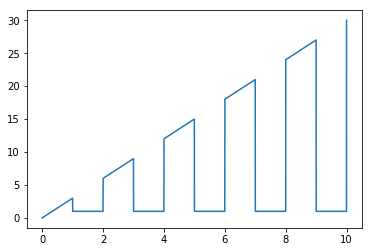

In [40]:
sampling_freq = 1000.
preprc = PreProcessing(fs=sampling_freq)

t = np.linspace(0, 10, 10000)
xt = np.ones_like(t)
xt[t.astype("int")%2==0] = 3 * t[t.astype("int")%2==0]

plt.plot(t, xt)

preprc.check_no_artifacts(xt, tolerance=1000)  
# by changing the tolerance we remove the recordings which have artifacts

#### remove_powerline

Here we remove the powerline effects. The powerline value is set to 50 Hz and all the harmonics

[  50.  100.  150.  200.  250.  300.  350.  400.  450.]


(-1, 1)

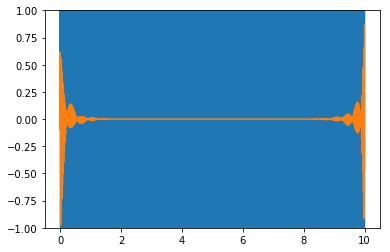

In [53]:
t = np.linspace(0, 10, 10000)
x = np.sin(2 * np.pi * t * 50)
x += np.cos(2 * np.pi * t * 100)

y = preprc.remove_powerline(x, bandwidth=3., powerline=50.)

plt.plot(t, x, label="original")
plt.plot(t, y, label="filtered")
plt.ylim([-1, 1])

Note that there are crazy edge effects! We remove them using the following function

(8000,)


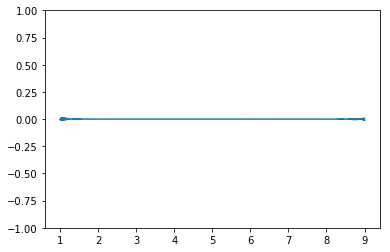

In [59]:
edge = 1000
yy = remove_edges(y, npoints=edge)
print(yy.shape)

plt.plot(t[edge:len(t)-edge], yy)
plt.ylim([-1,1]);